In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)
pd.set_option('max_rows',90)

In [2]:
df=pd.read_csv("Desktop\Micro-Credit-Project\Data file.csv")

In [3]:
df.shape

(209593, 37)

our data set has 209593 rows and 37 columns including target variable

# Exploratory data analysis

In [4]:
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In this our target column is label that we need to predict.Let us find the types of each column in our data set for this we
use dtype function.

In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

All the columns are numerical data type but our target variable label has two columns 0 and 1 where 0 indicates that person
failed to pay the loan and 1 indicates that person successed to pay the loan.Before proceeding further let us check there are
any null values.

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

Great our data set do not have any null values.Let us proceed further.

In [7]:
df.describe()

Unnamed: 0          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean   104797.000000       0.875177    8112.343445    5381.402289   
std     60504.431823       0.330519   75696.082531    9220.623400   
min         1.000000       0.000000     -48.000000     -93.012667   
25%     52399.000000       1.000000     246.000000      42.440000   
50%    104797.000000       1.000000     527.000000    1469.175667   
75%    157195.000000       1.000000     982.000000    7244.000000   
max    209593.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  \
count      209593.000000     209593.000000  209593.000000  209593.000000   
mean         3712.202921       2064.452797       3.978057    3737.355121   
std         53374.833430       2370.786034       4.256090   53643.625172   
min           -29.000000          0.000000       0.000000       0.000000   
25%             0.000000        770.000000       1.000000       0.000000   
50%             0.000000       1539.000000       3.000000       2.000000   
75%             0.000000       2309.000000       5.000000       6.000000   
max        999171.809410      55000.000000     203.000000  999606.368132   

       sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
count      209593.000000         209593.000000         209593.000000   
mean         7704.501157           1812.817952           3851.927942   
std         10139.621714           2070.864620          54006.374433   
min             0.000000              0.000000           -200.000000   
25%          1540.000000            770.000000             11.000000   
50%          4628.000000           1539.000000             33.900000   
75%         10010.000000           1924.000000             83.000000   
max        810096.000000          55000.000000         999479.419319   

       cnt_ma_rech90   fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count   209593.00000  209593.000000      209593.000000         209593.000000   
mean         6.31543       7.716780       12396.218352           1864.595821   
std          7.19347      12.590251       16857.793882           2081.680664   
min          0.00000       0.000000           0.000000              0.000000   
25%          2.00000       0.000000        2317.000000            773.000000   
50%          4.00000       2.000000        7226.000000           1539.000000   
75%          8.00000       8.000000       16000.000000           1924.000000   
max        336.00000      88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.0

There are no null values in our data set as the above staistical data shows there are no missing values.

Let us check the target column which is label for further processing.

In [8]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

So as the output shows clearly there is clearly a class imbalance issue in our data set so we need to take care of it.For better understanding let us plot a count plot for clear visualization.

Text(0.5, 1.0, 'Success vs failure')

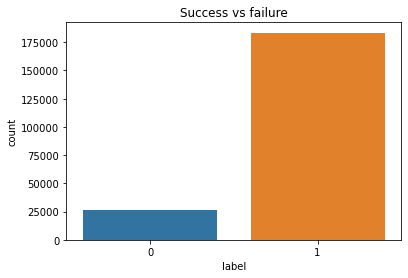

In [9]:
sns.countplot(df['label'])
plt.title("Success vs failure")

As shown in the output there is a clear class imbalance issue.

In [10]:
df_new=df.copy()

Let us plot a scatter plot for all the columns with the target variable to see the distribution between all the columns

In [11]:
df_new.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [12]:
df_new_1=df_new.drop(columns="Unnamed: 0",axis=1)
data2=df_new_1["label"]
data1=df_new_1.drop(columns="label")

We dropped the unnamed column from our data set as it does not provide any inference for our prediction.

Let us plot a scatter plot for all the columns in our data set 

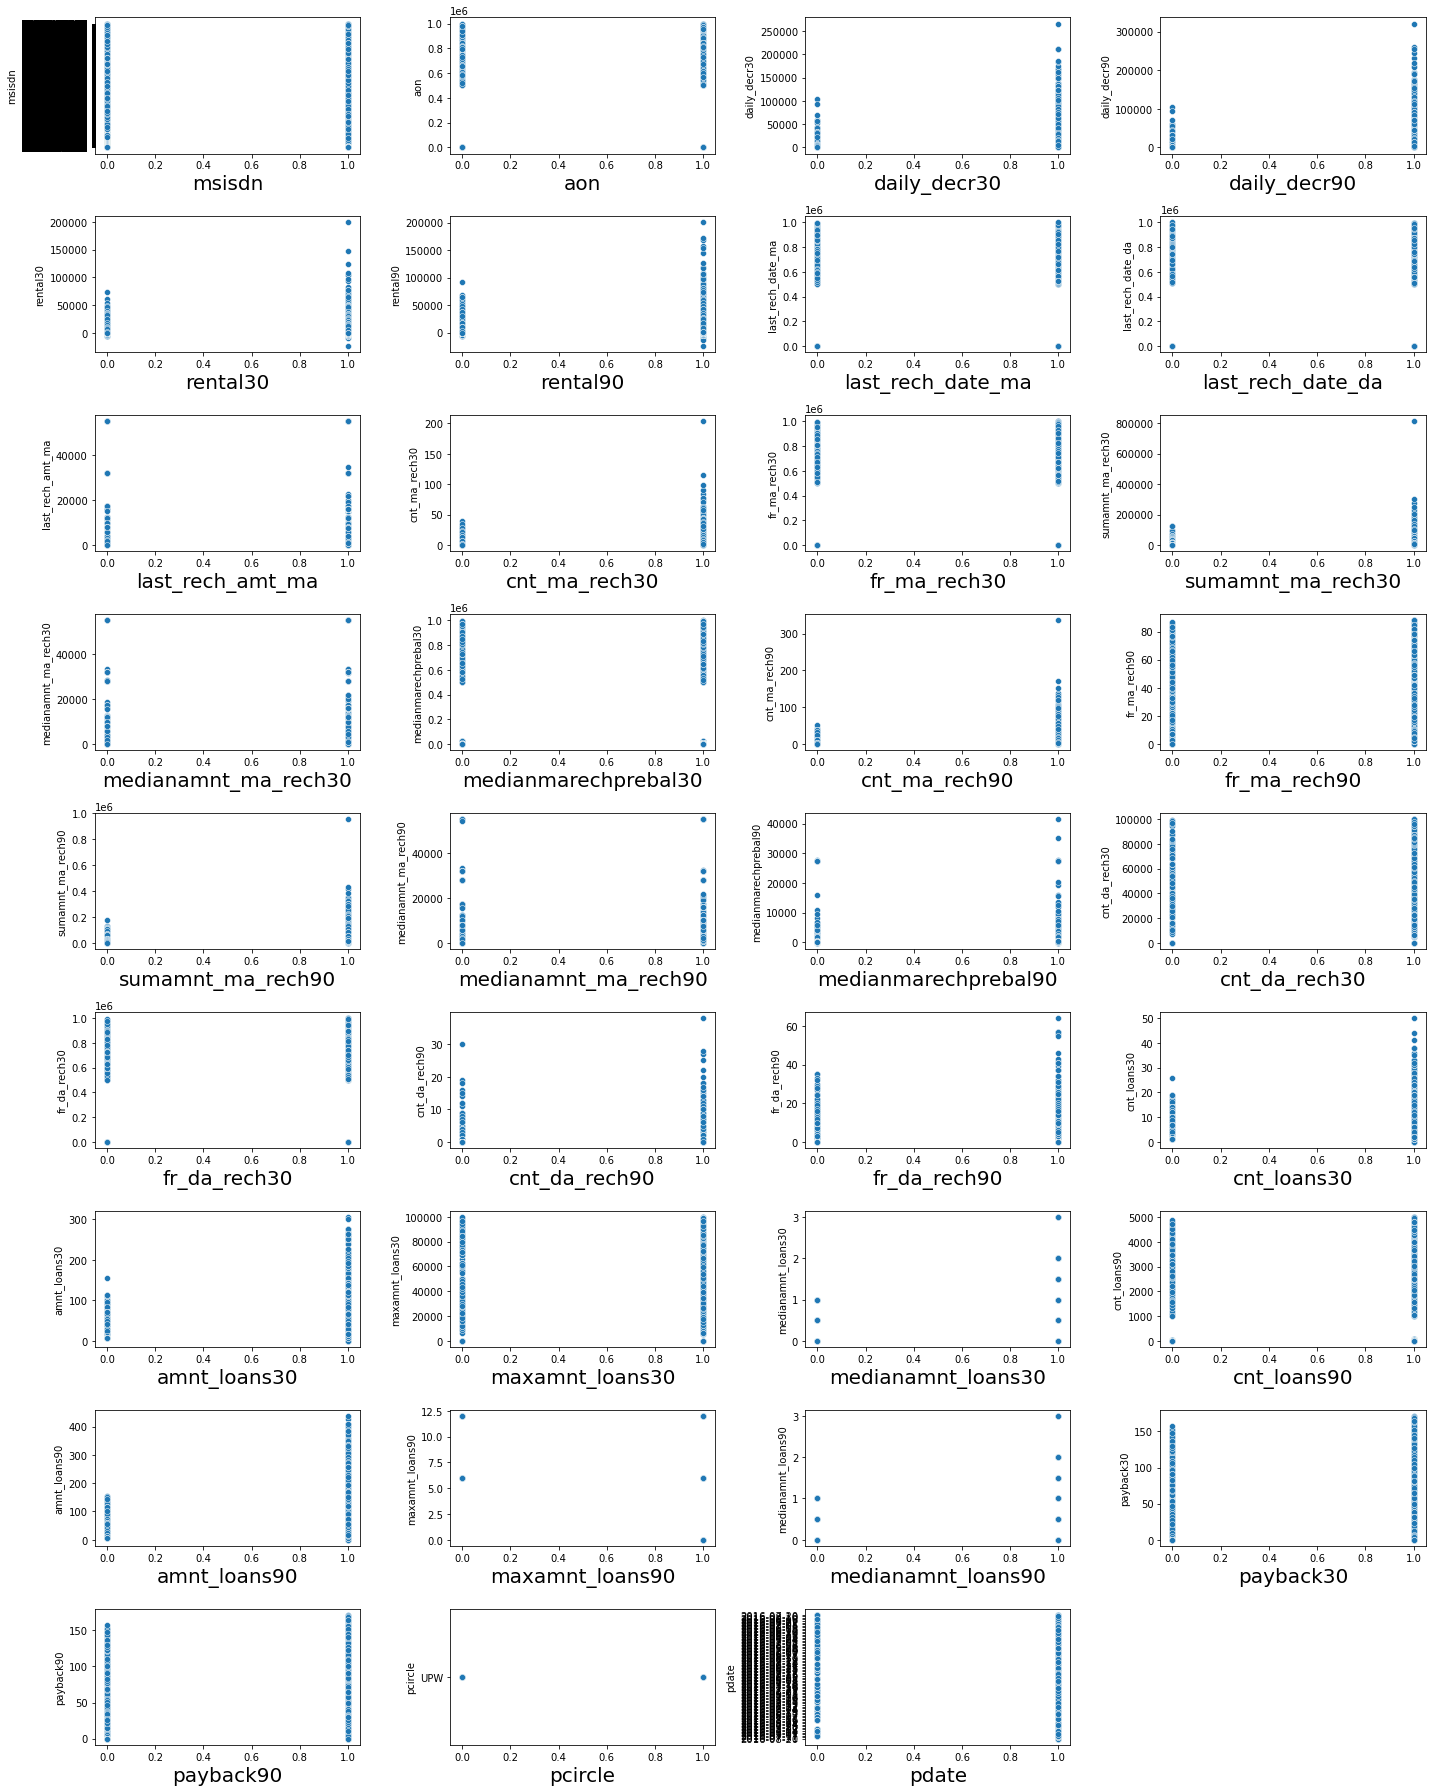

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=36:
        ax=plt.subplot(9,4,plotnumber)
        sns.scatterplot(data2,data1[column])
        plt.xlabel(column,fontsize=20)
        
        plotnumber+=1
plt.tight_layout()

As the scatter plots shows there is no linear relation ship between all the columns with target variables.

Let us check for skewness in our data set

In [22]:
x=df_new_1.drop(columns=['label'])
y=df_new_1['label']

In [23]:
x.skew()

aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loa

All the columns in  our data set are highly skewed need to remove the skewness

In [24]:
from sklearn.preprocessing import power_transform
df_new_1=power_transform(x)
df_new_1=pd.DataFrame(df_new_1,columns=x.columns)

ValueError: could not convert string to float: '21408I70789'